# <span style="color:#51a2d6; font-size:24px; font-weight:700"> Module 7 - Clustering Exercises

This notebook tests the concepts of clustering using seeds dataset. The data belongs to three different varieties of wheat: Kama, Rosa and Canadian, with 70 elements for each variety. The data is ideal for doing classification and clustering. 

Perform clustering on the dataset using K-Means, Hierarchical and Dbscan methods.

In [1]:
seeds_data = read.csv("/dsa/data/all_datasets/seeds/seeds_data",header=FALSE,sep="")
head(seeds_data)

V1,V2,V3,V4,V5,V6,V7,V8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [2]:
header = c("area","perimeter","compactness","length_of_kernel","width_of_kernel","asymmetry_coefficient","length_of_kernel_groove","variety")
names(seeds_data)=header
summary(seeds_data)

      area         perimeter      compactness     length_of_kernel
 Min.   :10.59   Min.   :12.41   Min.   :0.8081   Min.   :4.899   
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:0.8569   1st Qu.:5.262   
 Median :14.36   Median :14.32   Median :0.8734   Median :5.524   
 Mean   :14.85   Mean   :14.56   Mean   :0.8710   Mean   :5.629   
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:0.8878   3rd Qu.:5.980   
 Max.   :21.18   Max.   :17.25   Max.   :0.9183   Max.   :6.675   
 width_of_kernel asymmetry_coefficient length_of_kernel_groove    variety 
 Min.   :2.630   Min.   :0.7651        Min.   :4.519           Min.   :1  
 1st Qu.:2.944   1st Qu.:2.5615        1st Qu.:5.045           1st Qu.:1  
 Median :3.237   Median :3.5990        Median :5.223           Median :2  
 Mean   :3.259   Mean   :3.7002        Mean   :5.408           Mean   :2  
 3rd Qu.:3.562   3rd Qu.:4.7687        3rd Qu.:5.877           3rd Qu.:3  
 Max.   :4.033   Max.   :8.4560        Max.   :6.550           Max.   :3  

In [3]:
# We should normalize the data so that variables that are on a larger scale doesn't influence the distance calculation
# by contribute more and dominate the hierarchical clustering

# Normalize the data first. You can normalize the variables in a data frame by using the preProcess function 
# in the "caret" package.

library(caret)
# Create a normalized data frame called "seeds_data_norm" by running the following commands:

preproc = preProcess(seeds_data)
seeds_data_norm = predict(preproc, seeds_data)

Loading required package: lattice
Loading required package: ggplot2


In [4]:
summary(seeds_data_norm)

      area           perimeter        compactness      length_of_kernel 
 Min.   :-1.4632   Min.   :-1.6458   Min.   :-2.6619   Min.   :-1.6466  
 1st Qu.:-0.8858   1st Qu.:-0.8494   1st Qu.:-0.5967   1st Qu.:-0.8267  
 Median :-0.1693   Median :-0.1832   Median : 0.1037   Median :-0.2371  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.8446   3rd Qu.: 0.8850   3rd Qu.: 0.7100   3rd Qu.: 0.7927  
 Max.   : 2.1763   Max.   : 2.0603   Max.   : 2.0018   Max.   : 2.3619  
 width_of_kernel   asymmetry_coefficient length_of_kernel_groove
 Min.   :-1.6642   Min.   :-1.95210      Min.   :-1.8090        
 1st Qu.:-0.8329   1st Qu.:-0.75734      1st Qu.:-0.7387        
 Median :-0.0572   Median :-0.06731      Median :-0.3766        
 Mean   : 0.0000   Mean   : 0.00000      Mean   : 0.0000        
 3rd Qu.: 0.8026   3rd Qu.: 0.71068      3rd Qu.: 0.9541        
 Max.   : 2.0502   Max.   : 3.16303      Max.   : 2.3234        
    variety      
 Min.   :-1.222 

In [5]:
head(seeds_data_norm)

area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.14175904,0.214948819,6.045733e-05,0.30349301,0.1413640,-0.9838010,-0.3826631,-1.221825
0.01116136,0.008204153,4.274938e-01,-0.16822270,0.1969616,-1.7839036,-0.9198156,-1.221825
-0.19160873,-0.359341919,1.438945e+00,-0.76181710,0.2075516,-0.6658882,-1.1863572,-1.221825
-0.34626388,-0.474200066,1.036904e+00,-0.68733567,0.3187467,-0.9585276,-1.2270506,-1.221825
0.44419577,0.329806966,1.371233e+00,0.06650665,0.8032397,-1.5597684,-0.4742231,-1.221825
-0.16067770,-0.267455401,1.019976e+00,-0.54740087,0.1413640,-0.8235144,-0.9198156,-1.221825


The values are normalised. 
All columns have 0 mean and standard deviation of 1 now. 
All columns contribute equally when calculating distances between each other. 
You can verify running below cell. 
Dont get confused looking at the first few decimal values of mean value 2.85. 
Look at the end where it is raised to the power of -16. So the value is **0.000000000000000285104126567158** 
which is almost zero. 
The standard deviation is 1.

In [6]:
mean(seeds_data_norm$area)
sd(seeds_data_norm$area)

[1] 2.851041e-16

[1] 1

**Activity 1: ** Compute the distances between data points (using euclidean distance) and save the result in seeds_dist. 
Use this distance in activity 2 for running hierarchical clustering. 

In [22]:
# Your code for activity 1 goes here

seeds_dist = dist(seeds_data_norm, method="euclidean")


**Activity 2: **  Run the Hierarchical clustering algorithm (using method="complete") on the normalized data "seeds_data_norm". 
Plot the cluster using plot() function.

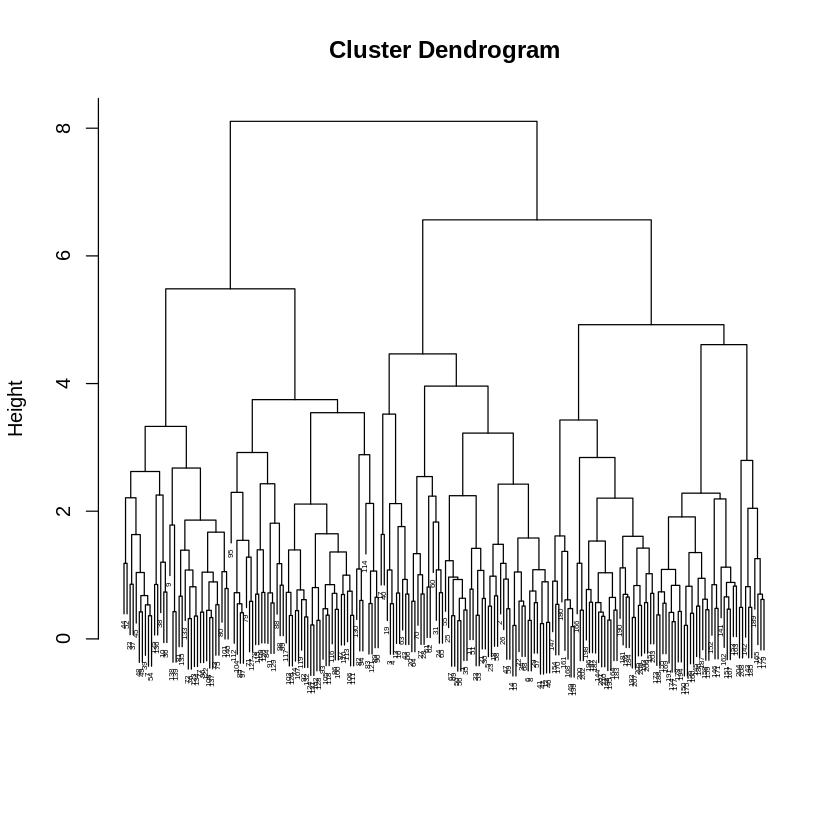

In [20]:
# Your code for activity 2 goes here

# Run Hierarchical clustering algorithm (using method="complete") on the normalized data seeds_data_norm
seeds_Hcluster = hclust(dist(seeds_data_norm), method="complete")

#plot the dendrogram of the hierarchical clustering process
plot(seeds_Hcluster, main = "Cluster Dendrogram", xlab = "", sub = "", cex = 0.4)


**Activity 3: ** Divide the data points into 3 clusters by using the cutree function. 
Assign this clusters to variable named seeds_HclusterGroups. 
Which cluster has maximum number of points?

In [126]:
# Your code for activity 3 goes here

seeds_HclusterGroups = cutree(seeds_Hcluster, k = 3)

# Use curtree function to divide the data points into 3 clusters.

seeds_HclusterGroups

table(seeds_HclusterGroups)
print( "Cluster 2 has the maxium number of points as seen in the table.")

[1] 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2
 [38] 2 2 1 1 1 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

seeds_HclusterGroups
 1  2  3 
56 84 70 

[1] "Cluster 2 has the maxium number of points as seen in the table."


**Activity 4: ** Use a 2-way table to see how many observations are classified into correct cluster.

In [24]:
# Your code for activity 4 goes here

# Compare the cluster assignments to the actual class labels

table(seeds_HclusterGroups, seeds_data$variety)


                    
seeds_HclusterGroups  1  2  3
                   1 56  0  0
                   2 14 70  0
                   3  0  0 70

**Activity 5: ** Use `tapply` to compare the average values in each of the variables for the 3 clusters (the centroids of the clusters).  
Check the average values for the unnormalized data so that it is easier to interpret. 

In [127]:
# Your code for activity 5 goes here


# An example:  t(tapply(seeds_data$perimeter,seeds_HclusterGroups,mean))


# seeds_HclusterGroups are the cluster assignments for the 210 observations in the dataset. So in above command 
# seeds_HclusterGroups will group the data in seeds_data$perimeter according to three clusters and mean is applied to each group.
# You will get the mean perimeter of each cluster in this way

t(tapply(seeds_data$area, seeds_HclusterGroups,mean))

t(tapply(seeds_data$perimeter, seeds_HclusterGroups,mean))

t(tapply(seeds_data$compactness, seeds_HclusterGroups,mean))

t(tapply(seeds_data$length_of_kernel, seeds_HclusterGroups,mean))

t(tapply(seeds_data$width_of_kernel, seeds_HclusterGroups,mean))

t(tapply(seeds_data$asymmetry_coefficient, seeds_HclusterGroups,mean))

t(tapply(seeds_data$length_of_kernel_groove, seeds_HclusterGroups,mean))




1,2,3
14.02607,17.87321,11.87386


1,2,3
14.15393,15.92238,13.24786


1,2,3
0.8785732,0.8839405,0.8494086


1,2,3
5.455982,6.076083,5.229514


1,2,3
3.204375,3.632119,2.853771


1,2,3
2.538004,3.568167,4.7884


1,2,3
5.020196,5.909714,5.1164


**Activity 6: ** Assign the points to three different clusters cluster1, cluster2 and cluster3 using subset function on seeds_data. 
Subset the data based on cluster assignments 1,2 and 3 in seeds_HclusterGroups. 

In [34]:
head(seeds_data)
seeds_HclusterGroups

area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


[1] 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2
 [38] 2 2 1 1 1 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [61]:
seeds_data2 <- cbind(seeds_data, seeds_HclusterGroups)
seeds_data2

area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety,seeds_HclusterGroups
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1,1
14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1,1
14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1,1
13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1,1
16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1,1
14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1,1
14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1,2
14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1,1
16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1,2


In [47]:
# Your code for activity 6 goes here

# Assign points to clusters


cluster1 = subset(seeds_data2, seeds_HclusterGroups == 1)

cluster2 = subset(seeds_data2, seeds_HclusterGroups == 2)

cluster3 = subset(seeds_data2, seeds_HclusterGroups == 3)


In [49]:
head(cluster1)
head(cluster2)
head(cluster3)

area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety,seeds_HclusterGroups
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1
14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1,1


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety,seeds_HclusterGroups
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
7,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1,2
9,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1,2
10,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1,2
32,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,1,2
36,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1,2
37,16.20,15.27,0.8734,5.826,3.464,2.823,5.527,1,2


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,variety,seeds_HclusterGroups
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
141,13.07,13.92,0.8480,5.472,2.994,5.304,5.395,3,3
142,13.32,13.94,0.8613,5.541,3.073,7.035,5.440,3,3
143,13.34,13.95,0.8620,5.389,3.074,5.995,5.307,3,3
144,12.22,13.32,0.8652,5.224,2.967,5.469,5.221,3,3
145,11.82,13.40,0.8274,5.314,2.777,4.471,5.178,3,3
146,11.21,13.13,0.8167,5.279,2.687,6.169,5.275,3,3


**Activity 7: ** Plot the clusters using ggplot on seeds_data dataset. 
Plot length_of_kernel on x-axis and width_of_kernel on y-axis. 
Use seeds_HclusterGroups for color parameter. 

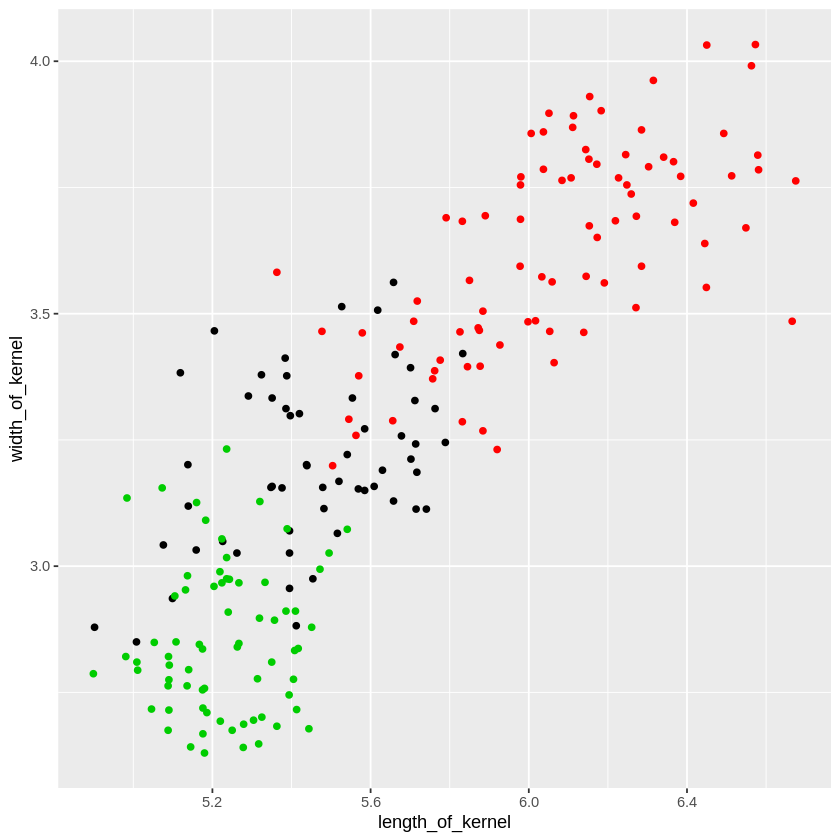

In [65]:
# Your code for activity 7 goes here

plot1 <- ggplot(seeds_data, aes(length_of_kernel, width_of_kernel)) + geom_point(colour = factor(seeds_HclusterGroups))
plot1


**Activity 8: **  Run the Hierarchical clustering algorithm using `eclust` function and also 
using complete linkage on the normalized data "seeds_data_norm". 
Plot the clusters using `fviz_cluster` function in factoExtra package.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
“argument frame is deprecated; please use ellipse instead.”

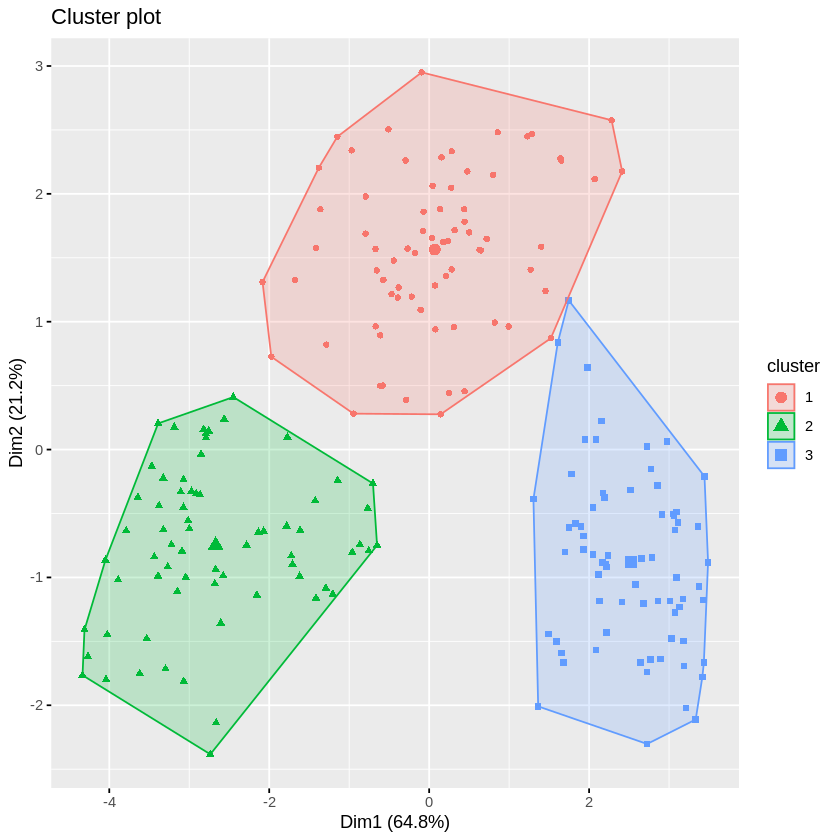

In [66]:
# Your code for activity 8 goes here

library(factoextra)
hc <- eclust(seeds_data_norm, "hclust", method="complete", graph=FALSE)

# plot clusters

fviz_cluster(hc, geom="point", frame=FALSE)



### K-Means Algorithm

**Activity 9: **  Run the Kmeans clustering algorithm on the normalized data 
"seeds_data_norm" and store the result in the variable seeds_Kmeans. 
Use 3 as the number of clusters and nstart=30. 
Extract the cluster assignments into a variable called seeds_kmeansClusters.
Plot the clusters using fviz_cluster function in factoExtra package.

In [67]:
install.packages("dbscan")
library(dbscan)
install.packages("fpc")
install.packages("factoextra")
install.packages("NbClust")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [76]:
# Your code for activity 9 goes here


# Run the k-means clustering algorithm on the normalized data creating 3 clusters. 


# seeds_Kmeans = kmeans()

seeds_Kmeans = kmeans(seeds_data_norm, 3, nstart=30)
seeds_Kmeans

# Extract clusters into seeds_kmeansClusters

seeds_kmeansClusters = seeds_Kmeans$cluster
seeds_kmeansClusters

K-means clustering with 3 clusters of sizes 70, 70, 70

Cluster means:
        area  perimeter compactness length_of_kernel width_of_kernel
1 -1.0219841 -1.0041884  -0.9136916       -0.9005912     -1.07179733
2 -0.1878283 -0.2170272   0.3976883       -0.3056103     -0.04082197
3  1.2098124  1.2212156   0.5160033        1.2062015      1.11261930
  asymmetry_coefficient length_of_kernel_groove    variety
1            0.72374972              -0.5934547  1.2218253
2           -0.66847065              -0.6754519 -1.1869160
3           -0.05527907               1.2689066 -0.0349093

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1] 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [77]:
table(seeds_kmeansClusters)

seeds_kmeansClusters
 1  2  3 
70 70 70 

**Activity 10: ** Use a 2-way table to see how many observations are classified into correct clusters. 
Compare predicted cluster assignments in seeds_kmeansClusters with values in seeds_data$variety

In [78]:
# Your code for activity 10 goes here

table(seeds_kmeansClusters, seeds_data$variety)


                    
seeds_kmeansClusters  1  2  3
                   1  0  0 70
                   2 68  2  0
                   3  2 68  0

What do you think of the confusion table? 
Since this is unsupervised learning, the algorithms wouldn't know the correct class labels. 
The cluster numbers are arbitrary, 
but does it seem that Kmeans does a good job in clustering? 
How do you explain seemingly overlapping clusters in your plot? 



### DBscan

**Activity 11: ** Run DBscan algorithm on the normalized data "seeds_data_norm" 
using all predictor variables and store the result in the variable db. 
Use `eps`=0.1 amd `minPts` = 5. 
Plot the clusters using `fviz_cluster` function in factoExtra package using columns length_of_kernel, width_of_kernel. 

Note: If you see an error "no rows to aggregate" that means with given `eps` value 
Dbscan could not fit clusters. 
Keep incrementing eps value in steps of 0.1 and try to fit the model again. 

Warning message in dbscan(seeds_data_norm, eps = 0.1, MinPts = 5):
“converting argument MinPts (fpc) to minPts (dbscan)!”

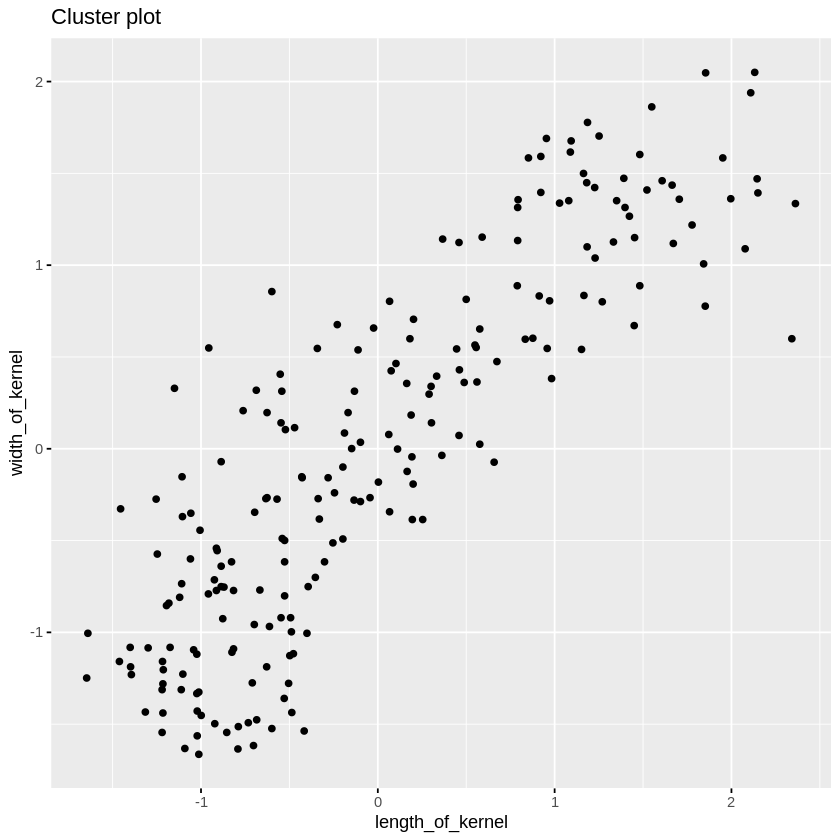

In [123]:
# Your code for activity 11 goes here


db <- dbscan(seeds_data_norm, eps = 0.1, MinPts = 5)

# Plot DBSCAN results

fviz_cluster(db, data = seeds_data_norm, choose.vars = c("length_of_kernel", "width_of_kernel"), geom = "point")





DBscan is performing very poorly on the dataset with `eps` value of 0.1 and `MinPts`=5. 


**Activity 12: **Find the appropriate `eps` value to use for seeds_data_norm dataset using KNNdistplot function. 


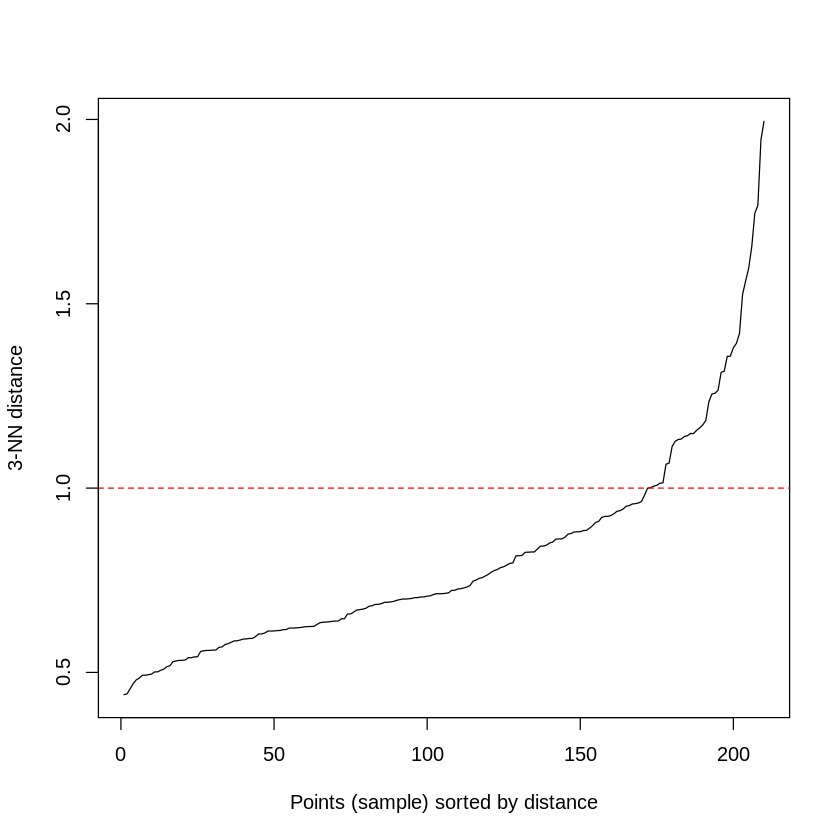

In [119]:
# Your code for activity 12 goes here

dbscan::kNNdistplot(seeds_data_norm, k =  3)
abline(h = 1, lty = 2,col='red')


**Activity 13: ** Run DBscan algorithm again on "seeds_data_norm" using `eps`
that you identified in activity 12 and `minPts` = 5. 
Plot the clusters using `fviz_cluster` function in factoExtra package.

Warning message in dbscan(seeds_data_norm, eps = 1, MinPts = 5):
“converting argument MinPts (fpc) to minPts (dbscan)!”

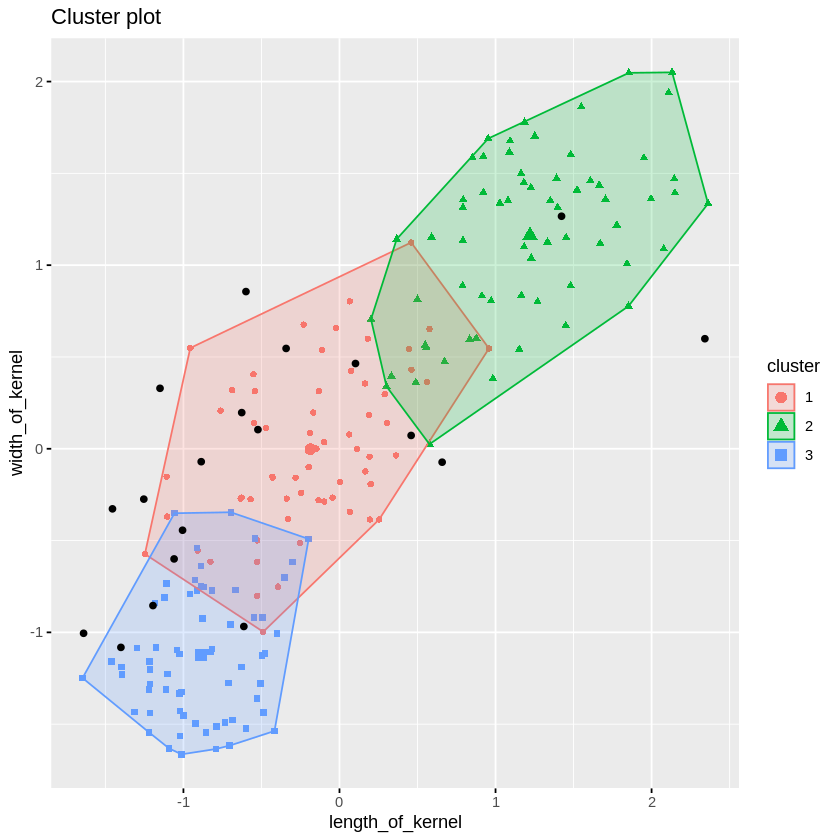

In [116]:
# Your code for activity 13 goes here

db <- dbscan(seeds_data_norm, eps = 1, MinPts = 5)

# Plot DBSCAN results

fviz_cluster(db, data = seeds_data_norm, choose.vars = c("length_of_kernel", "width_of_kernel"), geom = "point")



As you have seen in the practice notebook DBscan is sensitive to eps value and MinPts argument values 
and doesn't perform well on all datasets because of varying densities of cluster populations. 
DBscan is not an ideal choice for this dataset.


# Save your notebook!